<a href="https://colab.research.google.com/github/casusorez/plasmodium/blob/main/demopalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir("/content")
print(os.getcwd())
os.chdir("drive/My Drive/Colab Notebooks/")
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content
/content/drive/My Drive/Colab Notebooks


# imports

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from math import *
import glob as gb
import cv2
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array,array_to_img
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
import numpy as np

# Classification de chiffres écrits à la main (MNIST DATASET 
http://yann.lecun.com/exdb/mnist/ )

In [ ]:
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

trainX, trainY, testX, testY = load_dataset()

## aprerçu des données d'entrainement

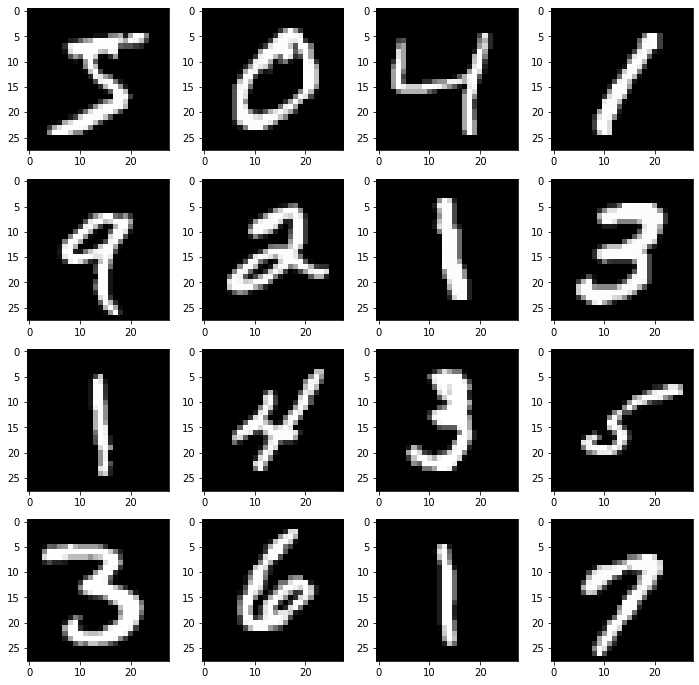

In [ ]:
_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for im, ax in zip(trainX, axs):
  im=im.reshape(28,28)  
  ax.imshow(im,cmap='gray')
plt.show()


## Prise en main des données

In [ ]:
print(trainX.shape)
print(testX.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Mon CNN 

In [ ]:
def CNN(input_shape,classes):

  model=Sequential()

  # Step 1 - Convolution
  model.add(Conv2D(16, (3, 3), padding='same', input_shape = input_shape, activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) 
  # Adding a second convolutional layer
  model.add(Conv2D(32, (3, 3), padding='same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # antes era 0.25
  # Adding a third convolutional layer
  model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # antes era 0.25
  # Step 3 - Flattening
  model.add(Flatten())
  # Step 4 - Full connection
  model.add(Dense(units = 512, activation = 'relu'))
  model.add(Dense(units = classes, activation = 'sigmoid'))

  model.summary()

  # Compiling the CNN
  model.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy', 
                    metrics = ['accuracy'])
  return model

# Classification de globules rouges pour le diagnostic du paludisme 

## Récupérer les images

In [ ]:
!rm -rf paluset/ data/
!git clone https://github.com/anissacherar/paluset.git
!unzip paluset/paluset.zip -d data 
!rm -rf paluset/paluset.zip

Cloning into 'paluset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
Archive:  paluset/paluset.zip
   creating: data/paluset/
   creating: data/paluset/neg/
  inflating: data/paluset/neg/10 (3).png  
  inflating: data/paluset/neg/10.png  
  inflating: data/paluset/neg/11 (2).png  
  inflating: data/paluset/neg/11 (3).png  
  inflating: data/paluset/neg/11 (4).png  
  inflating: data/paluset/neg/11 (5).png  
  inflating: data/paluset/neg/11.png  
  inflating: data/paluset/neg/12 (2).png  
  inflating: data/paluset/neg/12 (3).png  
  inflating: data/paluset/neg/12 (4).png  
  inflating: data/paluset/neg/12.png  
  inflating: data/paluset/neg/14.png  
  inflating: data/paluset/neg/15 (2).png  
  inflating: data/paluset/neg/15.png  
  inflating: data/paluset/neg/16 (2).png  
  inflating: data/paluset/neg/16 (

## Définition des sets d'entrainement et de test

In [ ]:
train_directory='data/paluset'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=60,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

train_set = train_datagen.flow_from_directory(
      train_directory,
      target_size=(50,50),
      subset='training',
      shuffle=True,

      class_mode='binary') 


validation_set = train_datagen.flow_from_directory(
      train_directory,
      target_size=(50,50),
      subset='validation',
      shuffle=False,
      class_mode='binary'
      )


checkpointer = ModelCheckpoint(filepath="mon_best_model.hdf5", 
                               monitor = 'val_accuracy',
                               mode='max',
                               verbose=1, 
                               save_best_only=True)

Found 321 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


## On regarde ce que donne l'augmentation des données

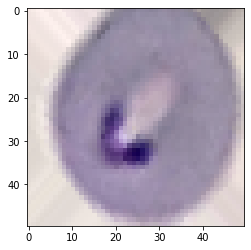

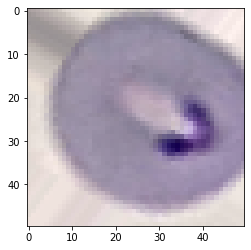

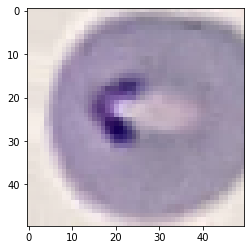

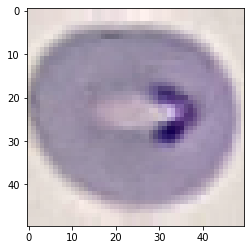

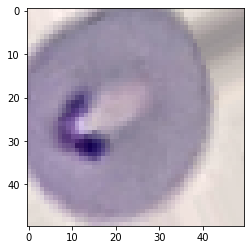

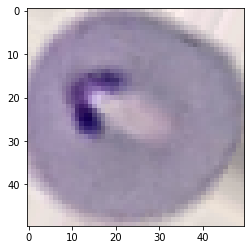

In [ ]:
img=load_img('/content/data/paluset/pos/101 (2).png',target_size=(50,50))
x=img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in train_datagen.flow(x,batch_size=1):
    plt.figure(i)
    plt.imshow(array_to_img(batch[0]))
    i+=1
    if i%6==0:
      break
plt.show()


## On utilise le même CNN pour apprendre 

In [ ]:
model=CNN(input_shape=(50,50,3),classes=1)
history=model.fit_generator(train_set,
  epochs = 50,
  callbacks=[checkpointer],
  validation_data=validation_set,
  verbose=1)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_102 (Dropout)        (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_103 (Dropout)        (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 12, 12, 64)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


11/11 [==============================] - 2s 152ms/step - loss: 0.8779 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to mon_best_model.hdf5
Epoch 2/50
11/11 [==============================] - 1s 133ms/step - loss: 0.7285 - accuracy: 0.4756 - val_loss: 0.6928 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/50
11/11 [==============================] - 1s 130ms/step - loss: 0.6969 - accuracy: 0.5220 - val_loss: 0.6934 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/50
11/11 [==============================] - 1s 132ms/step - loss: 0.7055 - accuracy: 0.4780 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/50
11/11 [==============================] - 1s 129ms/step - loss: 0.6963 - accuracy: 0.4443 - val_loss: 0.6934 - val_accuracy: 0.5000

Epoch 00005: val_accuracy did not impr

## TEST

In [ ]:
mon_model = tf.keras.models.load_model('mon_best_model.hdf5')
validation_set.reset()
_, acc = mon_model.evaluate(validation_set, verbose=1)
print('> %.3f' % (acc * 100.0))
predictions=mon_model.predict(validation_set)
confusion=metrics.confusion_matrix(validation_set.classes, np.round(predictions[:,0]))
print(confusion)
rapport=pd.DataFrame({"Image":validation_set.filenames,"label":validation_set.classes,"pred":np.round(predictions[:,0])})
print(rapport)

3/3 [==============================] - 0s 51ms/step - loss: 0.1719 - accuracy: 0.9875
> 98.750
[[40  0]
 [ 1 39]]
             Image  label  pred
0   neg/10 (3).png      0   0.0
1       neg/10.png      0   0.0
2   neg/11 (2).png      0   0.0
3   neg/11 (3).png      0   0.0
4   neg/11 (4).png      0   0.0
..             ...    ...   ...
75     pos/167.png      1   1.0
76     pos/168.png      1   1.0
77     pos/169.png      1   1.0
78  pos/17 (2).png      1   1.0
79      pos/17.png      1   1.0

[80 rows x 3 columns]


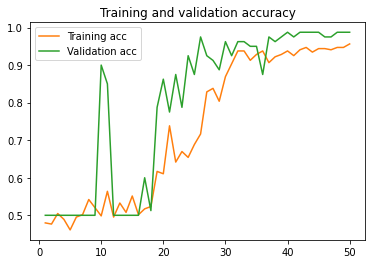

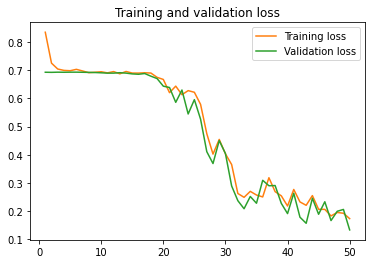

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'C1', label='Training acc')
plt.plot(epochs, val_acc, 'C2', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'C1', label='Training loss')
plt.plot(epochs, val_loss, 'C2', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## On visualise quelques images mal classées

pos/154.png


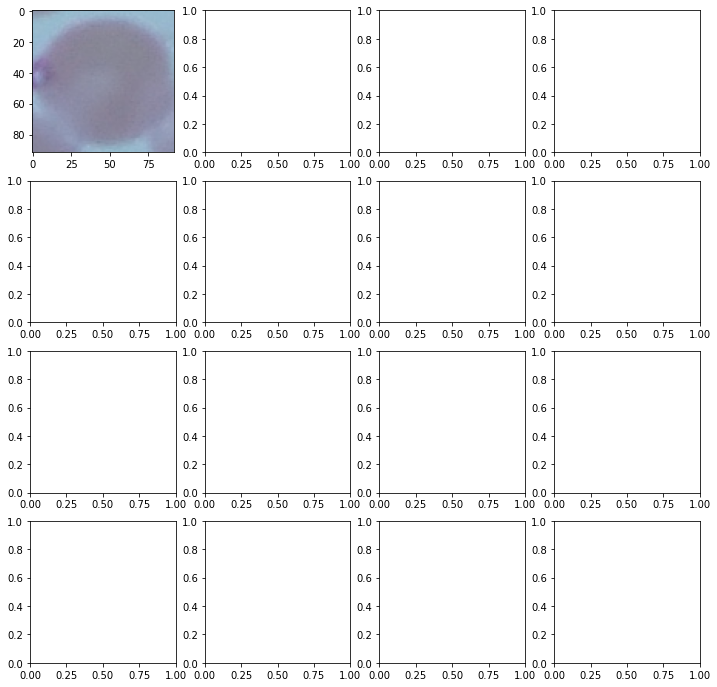

In [ ]:
fnames = validation_set.filenames ## fnames is all the filenames/samples used in testing
errors = np.where(np.round(predictions[:,0]) != validation_set.classes)[0] ## misclassifications done on the test data where y_pred is the predicted values

"""for i in errors:
    print(fnames[i])
    img=cv2.imread('data/paluset/'+fnames[i])
    plt.imshow(img)
    plt.show()"""

_, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()
for im, ax in zip(errors, axs):
  img=cv2.imread('data/paluset/'+fnames[im])
  print(fnames[im])
  ax.imshow(img)
plt.show()

## Prédiction d'une seule image 

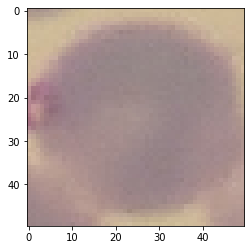

(1, 50, 50, 3)
prédiction brute : [[0.3402532]]
prédiction arrondie : [[0.]]
(1, 25, 25, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


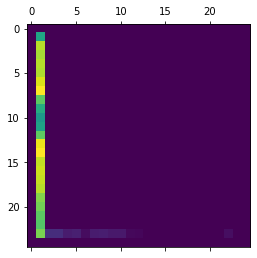

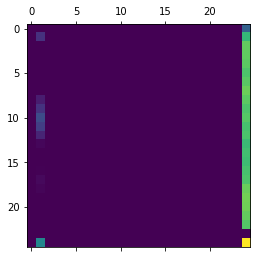

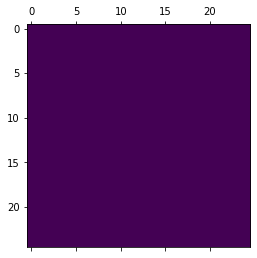

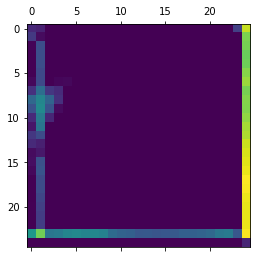

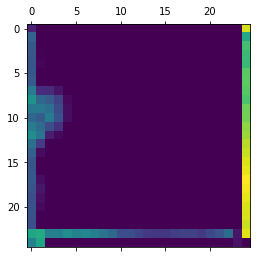

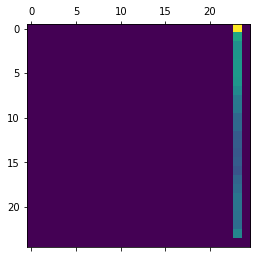

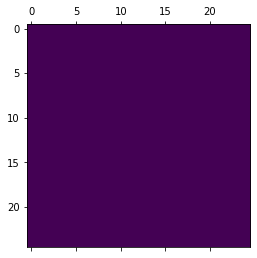

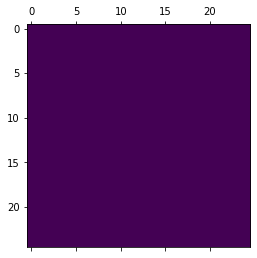

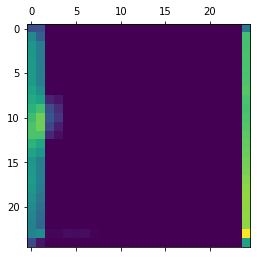

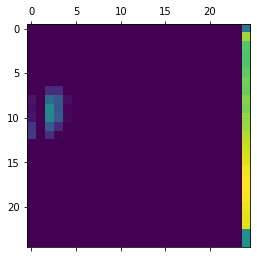

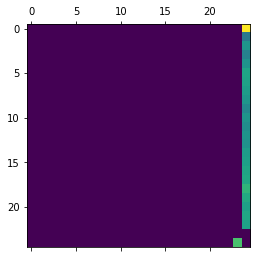

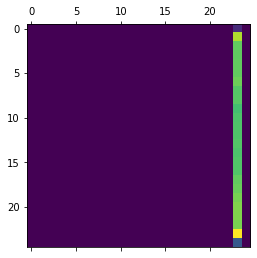

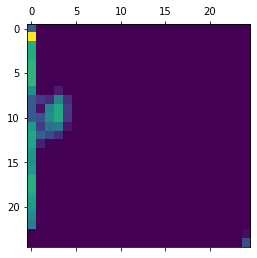

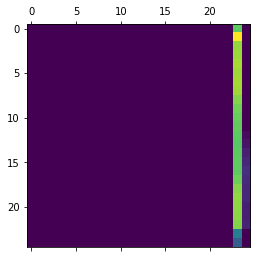

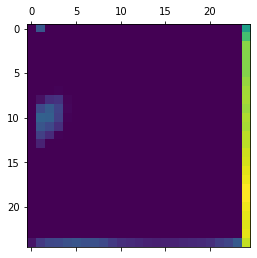

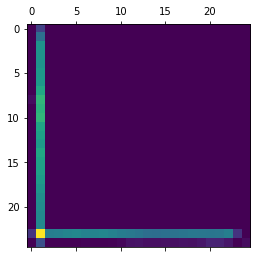

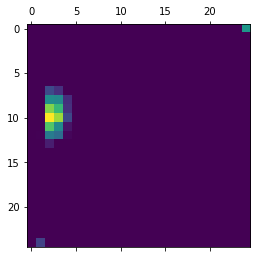

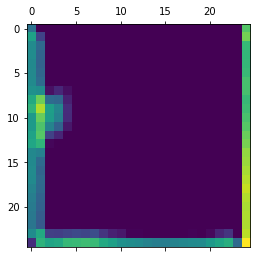

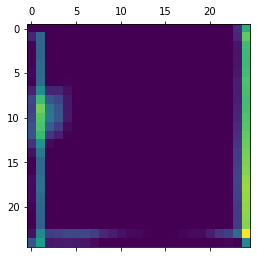

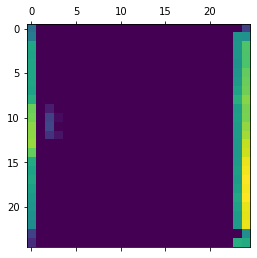

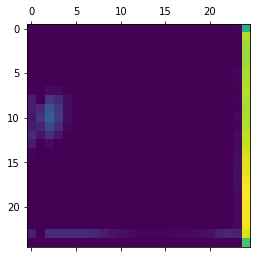

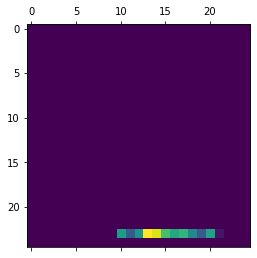

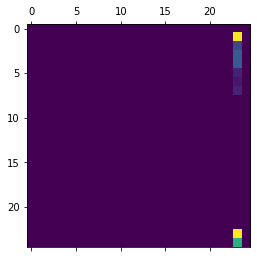

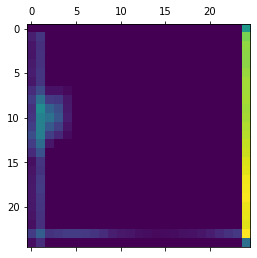

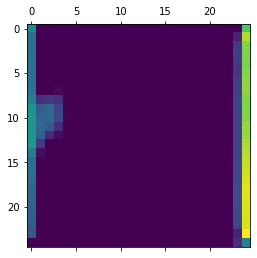

In [ ]:
from keras.preprocessing import image
from keras import models

img_path = 'data/paluset/pos/154.png'
img = image.load_img(img_path, target_size=(50, 50))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

print("prédiction brute :", mon_model.predict(img_tensor))
print("prédiction arrondie :", np.round(mon_model.predict(img_tensor)))

layer_outputs = [layer.output for layer in model.layers[:12]] 
# on extrait les sorties de chaque couche de notre réseau
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

#toutes les transformations que subit notre image dans les couches
activations = activation_model.predict(img_tensor) 

#on teste si ça marche bien 
first_layer_activation = activations[3]
print(first_layer_activation.shape)

for i in range (first_layer_activation.shape[1]):
  plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
  